In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/서울특별시 공공자전거 대여소별 이용정보(월별)_23.1-6.csv', encoding='cp949')

In [3]:
df

,자치구,대여소명,기준년월,대여건수,반납건수
0,강남구,2301. 현대고등학교 건너편,202301,383,439
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),202301,433,446
2,강남구,2303. 논현역 10번출구,202301,648,508
3,강남구,2304. 대현그린타워,202301,76,55
4,강남구,2305. MCM 본사 직영점 앞,202301,172,179
...,...,...,...,...,...
16301,중랑구,4837. 양원지구 힐데스하임 앞,202306,853,827
16302,중랑구,4838.동원사거리 행복오피스텔 앞,202306,900,669
16303,중랑구,4840. 서울시 북부병원 앞,202306,875,897
16304,중랑구,4841. 중화수경공원,202306,1886,2147


In [24]:
df['대여건수'] = pd.to_numeric(df['대여건수'].str.replace(',', ''), errors='coerce')
df['반납건수'] = pd.to_numeric(df['반납건수'].str.replace(',', ''), errors='coerce')

In [25]:
result_df = df.groupby('자치구', as_index=False).agg({'대여건수': 'sum', '반납건수': 'sum'})

In [26]:
result_df.columns = ['자치구명', '대여건수', '반납건수']

In [27]:
result_df.head()

,자치구명,대여건수,반납건수
0,강남구,673634,633867.0
1,강동구,933894,939209.0
2,강북구,335276,328670.0
3,강서구,2425742,2408730.0
4,관악구,540994,529883.0


In [82]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import ticker

In [74]:
matplotlib.rcParams['font.family'] = 'appleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

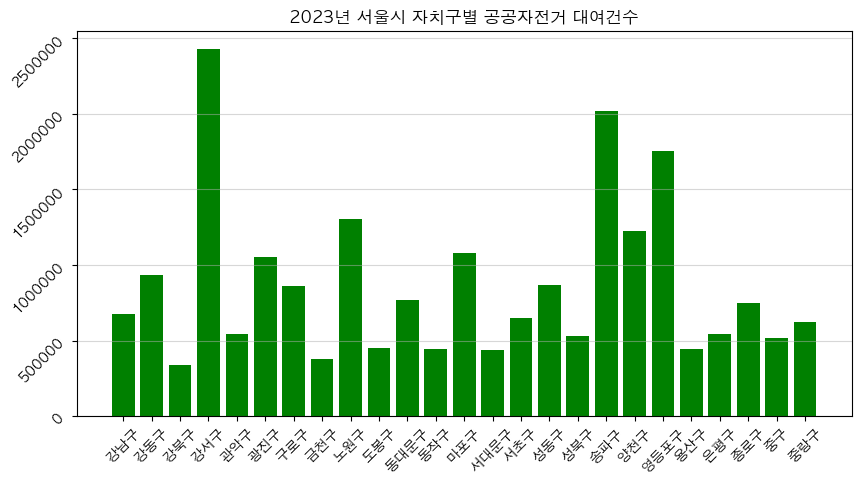

In [97]:
plt.figure(figsize=(10, 5))
plt.title('2023년 서울시 자치구별 공공자전거 대여건수')
plt.bar(result_df['자치구'], result_df['대여건수'], color='green')
formatter = ticker.ScalarFormatter()
formatter.set_scientific(False)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.gca().yaxis.set_major_formatter(formatter)
plt.savefig('./result/2023년 서울시 자치구별 공공자전거 대여건수.png')
plt.show()